# Intro

In [205]:
#Read in libraries
import pandas as pd
import swifter

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [206]:
#Set style for matplotlib
plt.style.use('ggplot')

In [207]:
#Set options for pandas
pd.options.display.max_columns =1_000
pd.set_option('display.max_rows', 1_000)
pd.set_option('display.float_format', '{:.2f}'.format)


In [208]:
#Set path to listings data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Set list of date columns to parse
dates = ['calendar_last_scraped', 'first_review', 'host_since', 'last_review']

#Read in file
listings = pd.read_csv(path + '/01_16_2020_Listings_Post_EDA.csv',index_col=0, parse_dates=dates)

## Preview Data

In [209]:
listings.head(1)

,accommodates,amenities,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,is_location_exact,last_review,latitude,longitude,market,maximum_maximum_nights,name,neighborhood_overview,neighbourhood_cleansed,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,space,summary,transit,zipcode,weekly_price,monthly_price
0,3,TV Cable TV Internet Wifi Kitchen Pets liv...,0,77,1.00,Real Bed,1.00,2.00,1,0.00,0.00,2019-04-03,1 week ago,moderate,San Francisco,100.00,New update: the house next door is under const...,25.00,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,1169,True,True,1.00,"San Francisco, California, United States",Holly,Duboce Triangle,100.00,within an hour,2008-07-31,email phone facebook reviews kba,* No Pets - even visiting guests for a short t...,958,True,True,2019-03-16,37.77,-122.43,San Francisco,30.00,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,183,51.00,170.00,Apartment,False,False,True,10.00,10.00,10.00,10.00,10.00,97.00,10.00,1.55,Entire home/apt,20190403130253.00,100.00,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,94117.00,1120.00,4200.00


In [210]:
#Print Shape
print('Listings shape: ', listings.shape)

#Check data types
listings.dtypes

Listings shape:  (88771, 68)


accommodates                                 int64
amenities                                   object
availability_30                              int64
availability_365                             int64
bathrooms                                  float64
bed_type                                    object
bedrooms                                   float64
beds                                       float64
chlc                                         int64
chlc_private_rooms                         float64
chlc_shared_rooms                          float64
calendar_last_scraped               datetime64[ns]
calendar_updated                            object
cancellation_policy                         object
city                                        object
cleaning_fee                               float64
description                                 object
extra_people                               float64
first_review                        datetime64[ns]
guests_included                

# Removing irrelevant features

In [211]:
#Removing columns that do not pertain to price
to_drop = ['calendar_last_scraped','calendar_updated', 'description','first_review','host_about','host_id',
          'host_listings_count','host_location','host_name', 'host_neighbourhood','house_rules','host_since','name',
          'neighborhood_overview', 'scrape_id','weekly_price','monthly_price', 'id','last_review',
           'longitude', 'latitude','space', 'summary', 'transit']

#Remove to_drop cols
listings.drop(columns=to_drop, inplace = True)
print('Current shape of listings: ', listings.shape)

Current shape of listings:  (88771, 44)


# Update Data Types

In [212]:
#Ordinal variables to convert to category
ordinals = ['review_scores_accuracy', 'review_scores_checkin','review_scores_cleanliness', 
            'review_scores_communication','review_scores_location','review_scores_rating',
            'review_scores_value']

#Numerics that are categorical variables
objects = ['zipcode']

#Convert 
listings[ordinals] = listings[ordinals].astype('category')
listings[objects] = listings[objects].astype('object')

# Missing Values

## Isolate columns with missing data
Create a dataframe that captures counts and % missing of listings columns missing data. Additionally, capture their data types and assign to data frame. 

In [213]:
#Write function that creates a df that returns stats regarding missing values in listings
def missing_updater(df):
    #capture count of missing values
    missing = pd.DataFrame(df.isna().sum())
    missing.rename(columns = {0:'Missing_Values'},inplace = True)
    #Calculate % of missing values
    missing['%_Missing'] = (missing['Missing_Values']/len(listings)) * 100
    #Capture data type of each column
    missing['Data_Types'] = pd.Series(listings.dtypes)
    #Keep rows where Missing_Values > 0 and sort by # of missing values
    missing = missing[missing['Missing_Values'] > 0]
    missing.sort_values(by = 'Missing_Values', ascending = False, inplace = True)
    return missing

#View
display(missing_updater(listings))

,Missing_Values,%_Missing,Data_Types
security_deposit,18573,20.92,float64
review_scores_value,18244,20.55,category
review_scores_location,18240,20.55,category
review_scores_checkin,18240,20.55,category
review_scores_accuracy,18225,20.53,category
review_scores_cleanliness,18216,20.52,category
review_scores_communication,18201,20.50,category
review_scores_rating,18174,20.47,category
reviews_per_month,17714,19.95,float64
host_response_rate,13260,14.94,float64


## Resolving missing values by data type

### Float64

#### Outlier Removal

In [214]:
#Print listings original shape
print('Listings data original shape:', listings.shape)

#Get list of float64s from missing.
floats= missing[missing.Data_Types == 'float64'].index.tolist()

#Listings outlier removal 
def remove_outlier(df, columns):
#Function to remove outliers from dataframe
    for col in columns:
        #Loop iterates over each column in df and returns df with outliers removed
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
        #Return df with outliers removed
        return df_out

#Remove outliers from listings and reassign to listings
listings = remove_outlier(listings, floats)

#Print listings original shape
print('Listings data new shape:', listings.shape)

Listings data original shape: (88771, 44)
Listings data new shape: (65767, 44)


Detect and remove outliers

In [215]:
#Replacing missing values in floatswith mean)
for col in listings[floats]:
    listings[col].fillna(listings[col].mean(), inplace = True)

#View remaining missing data from listings
display(missing_updater(listings))

,Missing_Values,%_Missing,Data_Types
review_scores_value,11469,17.44,category
review_scores_checkin,11465,17.43,category
review_scores_location,11465,17.43,category
review_scores_accuracy,11463,17.43,category
review_scores_cleanliness,11463,17.43,category
review_scores_communication,11463,17.43,category
review_scores_rating,11449,17.41,category
host_response_time,8849,13.46,object
zipcode,2908,4.42,object
market,202,0.31,object


### Objects

In [216]:
#Capture list of index for objects
objects = missing[missing['Data_Types']== 'object'].index.tolist()

#Apply forward and back fill on missing values
listings[objects]=listings[objects].ffill().bfill()

#View remaining missing data from listings
display(missing_updater(listings))

,Missing_Values,%_Missing,Data_Types
review_scores_value,11469,17.44,category
review_scores_checkin,11465,17.43,category
review_scores_location,11465,17.43,category
review_scores_accuracy,11463,17.43,category
review_scores_cleanliness,11463,17.43,category
review_scores_communication,11463,17.43,category
review_scores_rating,11449,17.41,category


### Category

Since we know that on average, the vast majority of reviews are relatively positive, we will populate review scores with the mode

In [217]:
#Get a list of the category variables from missing
categories = list(missing[missing['Data_Types'] == 'category'].index)

#Iterates each column in categories and replaces each column's NA's with the column's mode
for category in listings[categories]:
    listings[category].fillna(listings[category].mode()[0], inplace = True)
    
#View remaining missing data from listings
display(missing_updater(listings))

,Missing_Values,%_Missing,Data_Types


# Feature Engineering

## Transform numeric columns

C:\Users\kishe\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


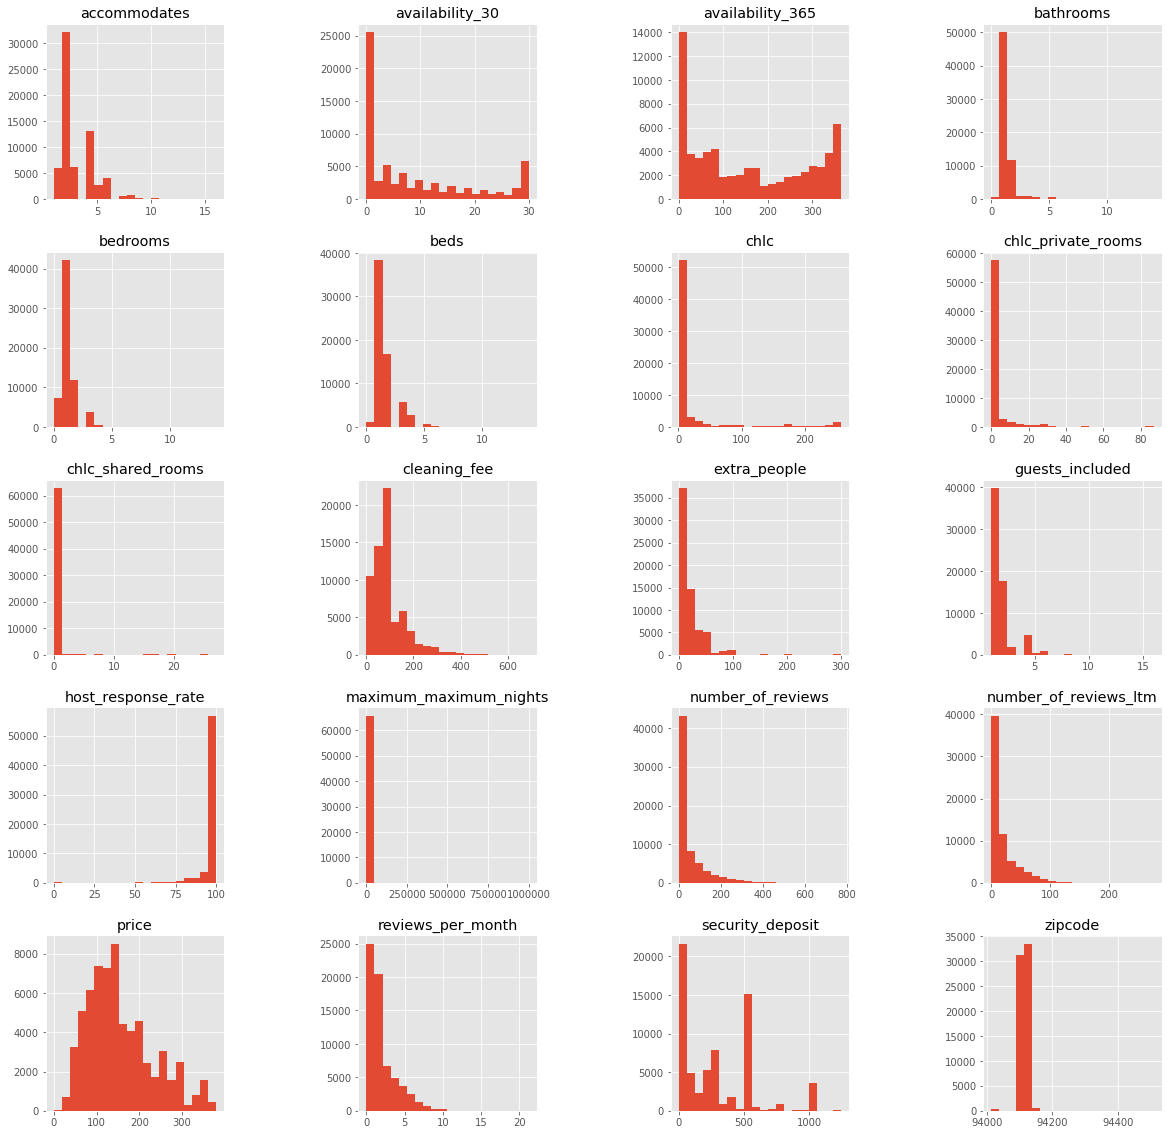

In [218]:
#Subset data to visualize distributions of numeric variables
numerics = listings.select_dtypes(exclude=['category','bool','object','datetime64'])

fig, ax = plt.subplots(figsize = (20,20))
numerics.hist(ax = ax, bins = 20)
fig.subplots_adjust(wspace=.75);
#chlc stands for calculated host listings count

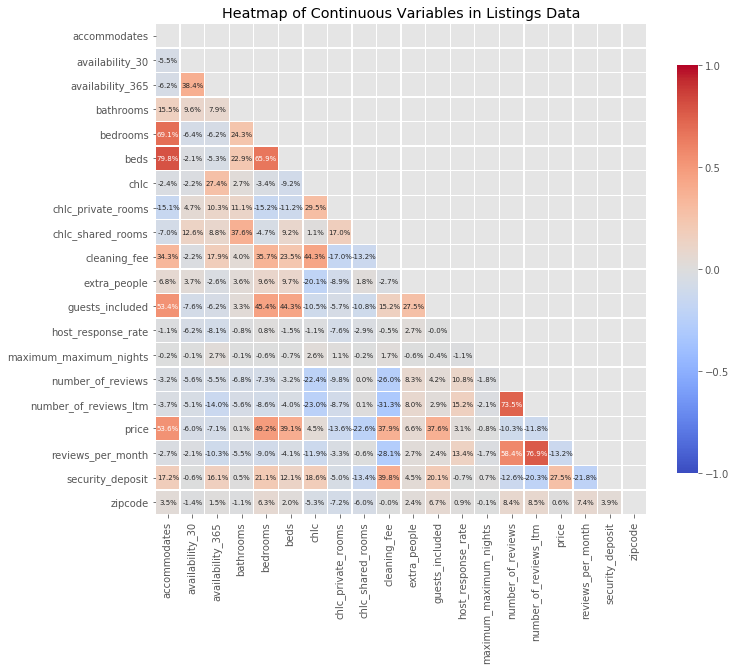

In [219]:
#Create heatmap of numeric data
corr = numerics.corr()

#Setup mask to hide upper triangle of heatmap
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .35,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .5, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 7},
                      fmt='.1%')

#add the column names as labels
ax.set_title('Heatmap of Continuous Variables in Listings Data');

## Adding new features

In [220]:
#Convert amenities into a count of amenities offered by airbnb
listings['total_amenities']= listings['amenities'].str.count(' ') + 1

#Check
listings[['total_amenities', 'amenities']].head(5)

,total_amenities,amenities
0,75,TV Cable TV Internet Wifi Kitchen Pets liv...
2,57,TV Internet Wifi Kitchen Free street parking...
3,50,TV Internet Wifi Kitchen Free street parking...
5,99,TV Cable TV Internet Wifi Kitchen Free par...
6,118,TV Cable TV Internet Wifi Paid parking off...


Split amenities and host_verifications and turn into categorical variables

In [221]:
#Split amenities, host_verifications and encode as dummy variables
temp1 = listings['amenities'].str.get_dummies(sep=' ')
temp2 = listings['host_verifications'].str.get_dummies(sep=' ')

temp = pd.concat([temp1, temp2], axis=1)

#Remove column headers shorter than 3 characters in length
for col in temp.columns: 
    if len(col) < 3:
        temp.drop(columns= col, inplace=True)

#Combine listings and temp
listings = pd.concat([listings, temp], axis=1)

#Drop amenities column
listings.drop(columns = ['amenities','host_verifications'], inplace = True)

#View Shape
print('Shape of data frame: ', listings.shape)

Shape of data frame:  (65767, 352)


# Encode Dummy Variables

In [222]:
#Subset Boolean values
bools = list(listings.select_dtypes(include=['bool']).columns)

#Convert True and False into ints
listings[bools] = listings[bools].astype(int)

#Convert encode data type object
temp=pd.get_dummies(listings.select_dtypes(include=['int32','object']))

#Combine listings and temp
listings = pd.concat([listings, temp], axis=1)

#Subset original object cols
objects = list(listings.select_dtypes(include=['object']).columns)

#Drop objects
listings.drop(columns= objects, inplace=True)
                      
#View shape of and preview data
print('Shape of data frame: ', listings.shape)
listings.head(3)

Shape of data frame:  (65767, 437)


,accommodates,availability_30,availability_365,bathrooms,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,cleaning_fee,extra_people,guests_included,host_identity_verified,host_is_superhost,host_response_rate,instant_bookable,is_location_exact,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,price,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,security_deposit,zipcode,total_amenities,24-hour,Accessible-height,Air,Amazon,BBQ,Baby,Babysitter,Balcony,Bath,Bathroom,Bathtub,Beach,Beachfront,Bed,Bedroom,Bidet,Body,Breakfast,Building,Buzzer/wireless,Cable,Carbon,Cat(s),Ceiling,Central,Changing,Children’s,Cleaning,Coffee,Convection,Cooking,Crib,DVD,Day,Disabled,Dishes,Dishwasher,Dog(s),Doorman,Double,Dryer,Echo,Electric,Elevator,Espresso,Essentials,Ethernet,Exercise,Extra,Family/kid,Fax,Fire,Fireplace,Firm,First,Fixed,Flat,Formal,Free,Full,Game,Garden,Gas,Ground,Gym,HBO,Hair,Hammock,Handheld,Hangers,Heat,Heated,Heating,High,High-resolution,Host,Hot,Indoor,Internet,Iron,Jetted,Keypad,Kitchen,Kitchenette,Lake,Laptop,Lock,Lockbox,Long,Luggage,Memory,Microwave,Mini,Mobile,Mountain,Mudroom,Murphy,Netflix,Other,Outdoor,Outlet,Oven,Pack,Paid,Patio,Pets,Pillow-top,Play/travel,Pocket,Pool,Printer,Private,Projector,Rain,Refrigerator,Roll-in,Room-darkening,Safety,Self,Shampoo,Shared,Shower,Single,Ski-in/Ski-out,Smart,Smoke,Smoking,Soaking,Sound,Stair,Stand,Standing,Step-free,Stove,Suitable,Sun,Table,Tennis,Terrace,Toilet,Walk-in,Warming,Washer,Waterfront,Well-lit,Wheelchair,Wide,Wifi,Window,Wine,access,accessible,aid,air,allowed,alone,and,area,around,backyard,balcony,bars,basics,bath,bathroom,bed,bedroom,before,blankets,books,card,chair,charger,check-in,checkout,clearance,comforts,computer,conditioning,connection,console,cooler,corner,court,covers,crib,detector,dining,dinnerware,door,doorway,drawer,dropoff,dryer,en.hosting_amenity_49,en.hosting_amenity_50,enter,entrance,entryway,equipment,essentials,events,extinguisher,fan,fireplace,floor,floors,foam,for,fridge,friendly,front,gates,grab,greets,grill,guards,guest,guests,gym,hallway,hallways,head,hoist,home,hot,intercom,kettle,kit,kitchen,lamps,level,linens,live,living,lock,loungers,machine,maker,mattress,missing:,monitor,monoxide,off,oven,paper,parking,path,pet(s),pillows,pit,player,pool,premises,profiling,property,rack,recommendations,room,screen,seating,shades,shower,silverware,soap,space,spot,staff,stairs,stays,steam,steps,street,suite,system,table,term,this,toilet,towel,toys,translation,tub,valet,view,water,wifi,with,workspace,you,None,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,photographer,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,host_identity_verified,host_is_superhost,instant_bookable,is_location_exact,require_guest_phone_verification,require_guest_profile_picture,requires_license,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Daly City,city_San Francisco,city_South San Francisco,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,market_San Francisco,neighbourhood_cleansed_Bayview,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Crocker Amazon,neighbourhood_cleansed_Diamond Heights,neighbourhood_cleansed_Downtown/Civic Center,neighbourhood_cleansed_Excelsior,neighbourhood_cleansed_Financial District,neighbourhood_cleansed_Glen Park,neighbourhood_cleanse

# Write finalized file to csv

In [224]:
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\04_Models'
listings.to_csv(path + '/01_19_2020_Listings_Processed.csv', sep = ',', )